In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
signal_data = np.load("org_signal_with_lossses.npy", allow_pickle=True)
background_data = np.load("org_background_with_losses.npy", allow_pickle=True)

In [3]:
signal = {}
background = {}

In [4]:
keys = list(signal_data.item().keys())

for key in keys:
    signal[key] = signal_data.item().get(key)
    background[key] = background_data.item().get(key)

In [5]:
def delete_branches(branches):
    del branches['jet_isbtagged_DL1r_77']
    del branches['mc_kFactor']
    del branches['RunYear']
    del branches['mc_rawXSection']
    del branches['lep_ID_0']
    del branches['p_Event_No']
    del branches['jet_pt']
    del branches['jet_eta']
    del branches['jet_phi']
    del branches['jet_e']
    del branches['lep_vz_0']
    del branches['lep_vz_1']
    del branches['taus_DL1r_0']
    del branches['p_sumElepAll_EJet']
    del branches['p_sumPtleptauAll_Ptjet']
    del branches['best_Z_Mll']
    del branches['best_Z_other_MtLepMet']
    del branches['best_Z_other_Mll']
    del branches['minOSSFMll']
    del branches['minOSMll']
    del branches['totalEventsWeighted']
    #del branches['weight_lumi_xsec'] #dodac potem do .root
    del branches['tau_charge_0']
    del branches['p_LBoostL1Tau_angle_farestJetToL2']
    del branches['eventNumber']
    #del branches['p_is2lepTight'] #flaga
    #del branches['p_isTauSelected'] #flaga
    del branches['tau_passEleBDT_0']
    del branches['tau_passMuonOLR_0']
    del branches['lep_ambiguityType_1']
    del branches['lep_ambiguityType_0']
    del branches['lep_plvWP_Tight_1']
    del branches['lep_plvWP_Tight_0']
    del branches['lep_isMedium_1']
    del branches['lep_isMedium_0']
    del branches['lep_isTightLH_1']
    del branches['lep_isTightLH_0']
    del branches['lep_d0_0']
    del branches['lep_BestMatchTrackEta_0']
    del branches['lep_BestMatchTrackPhi_0']
    del branches['lep_BestMatchTrackZ0_0']
    del branches['lep_BestMatchTrackQ_0']
    del branches['lep_chargeIDBDTLoose_0']
    del branches['lep_ID_1']
    del branches['lep_d0_1']
    del branches['lep_BestMatchTrackEta_1']
    del branches['lep_BestMatchTrackPhi_1']
    del branches['lep_BestMatchTrackZ0_1']
    del branches['lep_BestMatchTrackQ_1']
    del branches['lep_chargeIDBDTLoose_1']
    del branches['tau_numTrack_0']
    del branches['tau_passJetIDRNNMed_0']
    del branches['sublead_jetEta']
    del branches['sublead_jetPt']
    del branches['p_angle_LeadJetSubLeadJet']
    del branches['p_LBoost2L_tauPt']
    del branches['p_LBoost2L_DiffLep1Lep2phi']
    del branches['p_LBoost2L_AngleL1L2']
    del branches['p_LBoostL1Tau_DiffTauLep1phi']
    del branches['p_LBoostL1Tau_AngleL1Tau']
    del branches['p_LBoostL2Tau_DiffTauLep2phi']
    del branches['p_LBoostL2Tau_AngleL2Tau']
    del branches['lep_Phi_0']
    del branches['lep_EtaBE2_0']
    del branches['lep_z0_0']
    del branches['lep_deltaz0_0']
    del branches['lep_BestMatchTrackD0_0']
    del branches['lep_E_1']
    del branches['lep_Phi_1']
    del branches['lep_EtaBE2_1']
    del branches['lep_deltaz0_1']
    del branches['lep_BestMatchTrackD0_1']
    del branches['tau_phi_0']
    del branches['lead_jetPhi']
    del branches['sublead_jetPhi']
    del branches['p_Dphi_j1_j2']
    del branches['p_Dphi_l1_j2']
    del branches['p_Dphi_l2_j2']
    del branches['p_invMass_l2_j2']
    del branches['p_angle_closetJetToTau']
    del branches['p_angle_farestJetToL1']
    del branches['p_LBoostL1Tau_AngleL2J2']
    del branches['p_LBoostL2Tau_AngleL2J2']
    del branches['p_LBoostL2Tau_AngleTauJ2']
    del branches['Losses']

In [6]:
delete_branches(signal)
delete_branches(background)

In [7]:
keys = list(signal.keys())

In [8]:
xlabels = ['GeV/c', 'GeV/c', 'deltaR', 'deltaR']

In [9]:
if 'nJets_OR' in keys:
    print(True)

True


In [10]:
signal_loss = np.load("signal_loss.npy", allow_pickle=True)
background_loss = np.load("background_loss.npy", allow_pickle=True)

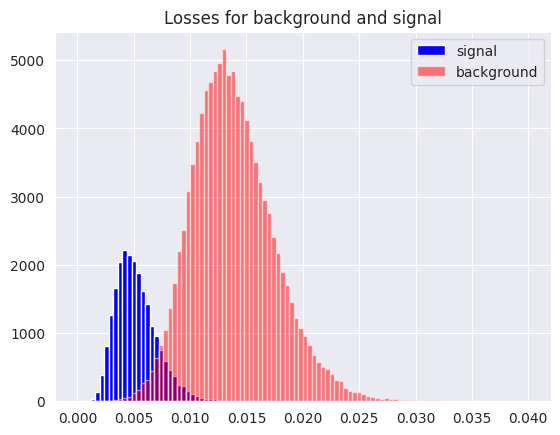

In [11]:
plt.hist(signal_loss,bins=100,range=(0,0.04),label="signal",alpha=1, color='blue')
plt.hist(background_loss,bins=100,range=(0,0.04),label="background",alpha=0.5, color='red')
plt.title("Losses for background and signal")
plt.legend()

plt.show()

In [12]:
sum_signal = 0
sum_background = 0
signal_cut_sum = 0
background_cut_sum = 0

for i in range(len(signal_loss)):
    sum_signal += signal_loss[i]
    if signal_loss[i] < 0.008:
        signal_cut_sum += signal_loss[i]

for i in range(len(background_loss)):
    sum_background += background_loss[i]
    if background_loss[i] > 0.008:
        background_cut_sum += background_loss[i]
        
print(f'Sum signal: {sum_signal}')
print(f'Sum background: {sum_background}')
print(f'Cut signal: {signal_cut_sum}')
print(f'Cut background: {background_cut_sum}')
print(f'Cut signal %: {signal_cut_sum / sum_signal * 100}')
print(f'Cut background %: {background_cut_sum / sum_background * 100}')

Sum signal: 119.48701191781507
Sum background: 1551.325833207066
Cut signal: 102.29986497475691
Cut background: 1524.027996824254
Cut signal %: 85.61588689247688
Cut background %: 98.24035442468079


In [13]:
def norm(arr):
    arr = np.array(arr)
    
    for i in range(len(arr)):
        arr[i] = arr[i]/np.sum(arr)

    return arr

In [14]:
keep = np.load("keep_data.npy", allow_pickle=True)
keys_keep = list(keep.item().keys())
keep_data = {}

for key in keys_keep:
    keep_data[key] = keep.item().get(key)

In [15]:
weight = keep_data['weight_lumi_xsec']
weight_signal = weight[:len(signal[keys[0]])]
weight_background = weight[len(signal[keys[0]]):]

In [16]:
len(weight_signal)

22876

In [17]:
final_keys = ['lep_Pt_0', 'tau_pt_0', 'DRll01', 'p_drCloserLepToTau']
arr_max = [500000, 400000, 5, 4]

In [18]:
len(weight_signal)

22876

In [19]:
norm_sig = {}
norm_bkg = {}

Surowe

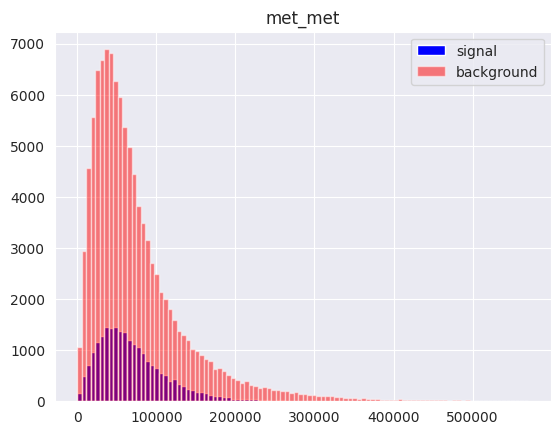

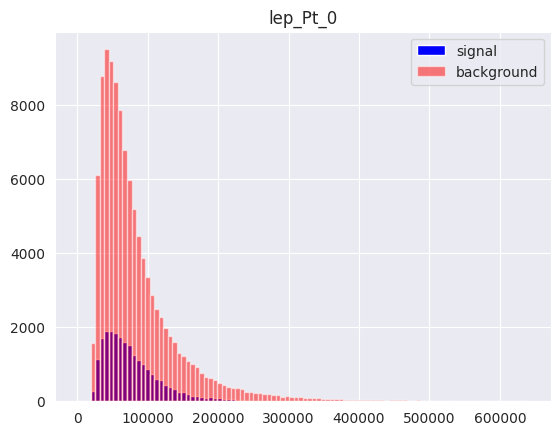

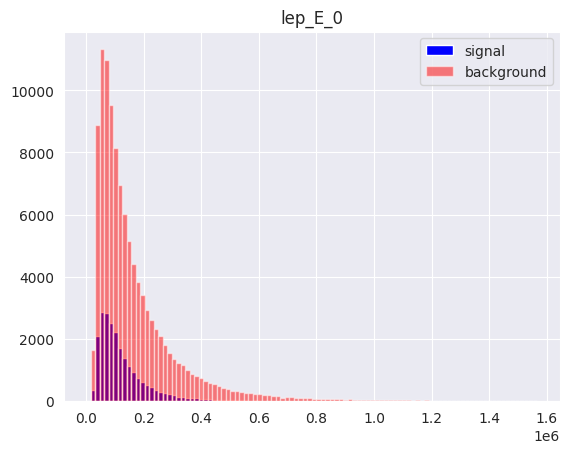

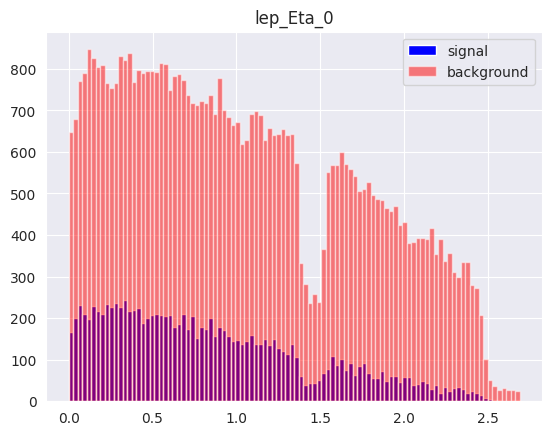

In [20]:
for i in range(len(final_keys)):
    plt.hist(signal[keys[i]],bins=100,range=(0,np.max(signal[keys[i]])),label="signal",alpha=1, color='blue')
    plt.hist(background[keys[i]],bins=100,range=(0,np.max(signal[keys[i]])),label="background",alpha=0.5, color='red')
    plt.title(keys[i])
    plt.legend()

    plt.show()

Do jedynki

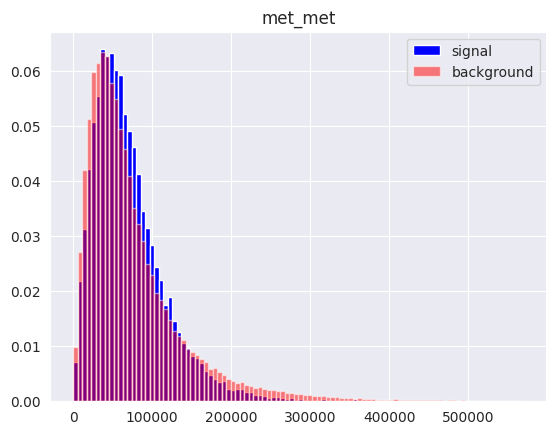

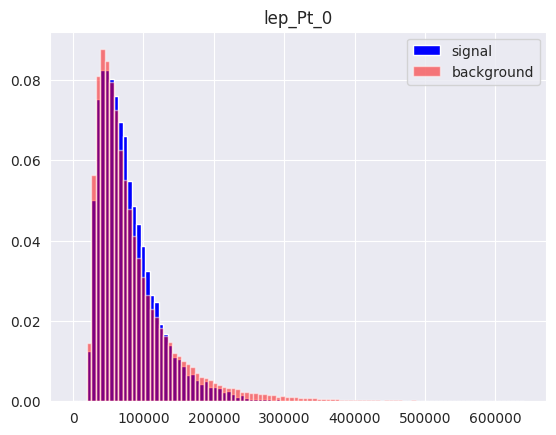

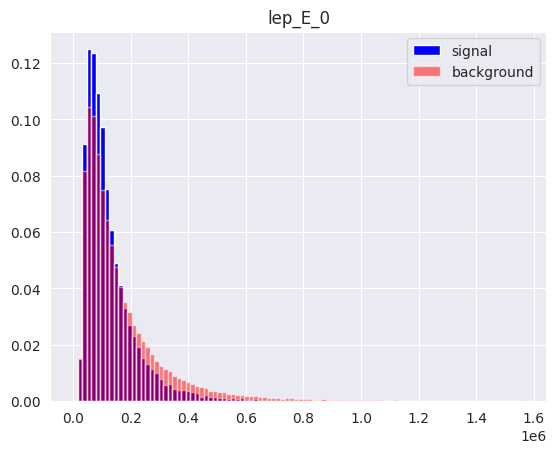

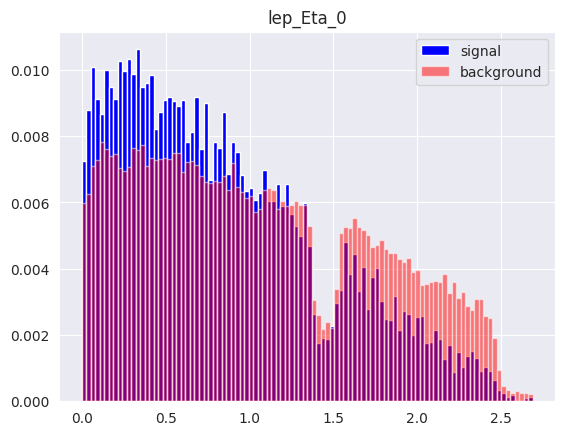

In [21]:
for i in range(len(final_keys)):

    weights_sig = np.ones_like(signal[final_keys[i]]) / len(signal[final_keys[i]])
    weights_bg = np.ones_like(background[final_keys[i]]) / len(background[final_keys[i]])
    plt.hist(signal[keys[i]],bins=100,range=(0,np.max(signal[keys[i]])),label="signal",alpha=1, color='blue', weights=weights_sig)
    plt.hist(background[keys[i]],bins=100,range=(0,np.max(signal[keys[i]])),label="background",alpha=0.5, color='red', weights=weights_bg)
    plt.title(keys[i])
    plt.legend()

    plt.show()

Z wagami

In [22]:
def selection(key):
    signal_arr_sel = []
    background_arr_sel = []
    signal_weight_sel = []
    background_weight_sel = []

    for i in range(len(weight_signal)):
        if signal['nJets_OR'][i] > 1 and signal['p_is2lepTight'][i] > 0 and signal['p_isTauSelected'][i] > 0 and signal['nJets_OR_DL1r_77'][i] == 0:
            signal_arr_sel.append(signal[key][i])
            signal_weight_sel.append(weight_signal[i])

    for j in range(len(weight_background)):
        if background['nJets_OR'][j] > 1 and background['p_is2lepTight'][j] > 0 and background['p_isTauSelected'][j] > 0 and background['nJets_OR_DL1r_77'][j] == 0:
            background_arr_sel.append(background[key][j])
            background_weight_sel.append(weight_background[j])

    return signal_arr_sel, background_arr_sel, signal_weight_sel, background_weight_sel

In [23]:
len(weight_signal)

22876

Max value on Y-axis for signal: 1.934666395187378
Max value on Y-axis for background: 147.02215576171875


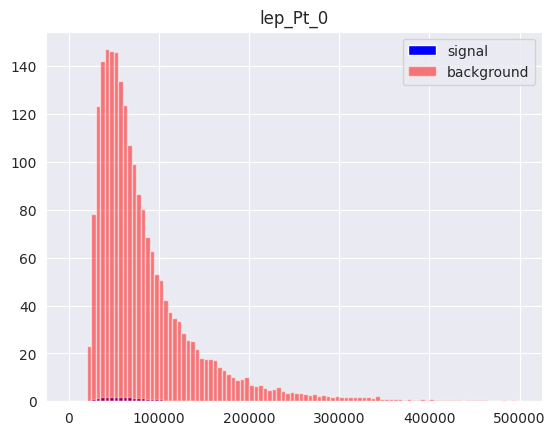

Max value on Y-axis for signal: 2.38712477684021
Max value on Y-axis for background: 306.02587890625


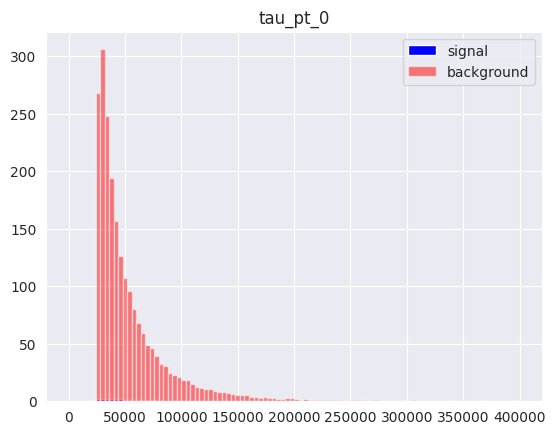

Max value on Y-axis for signal: 1.3871896266937256
Max value on Y-axis for background: 53.78020477294922


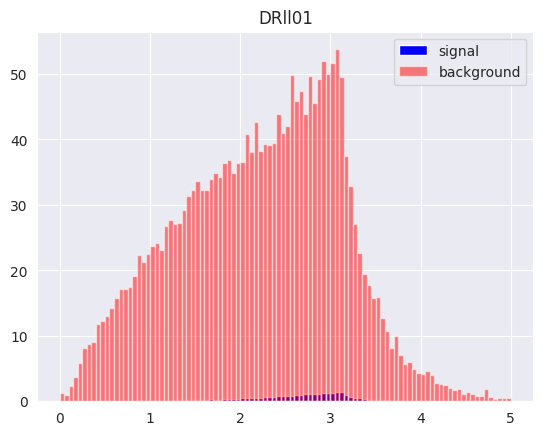

Max value on Y-axis for signal: 1.0887835025787354
Max value on Y-axis for background: 54.290863037109375


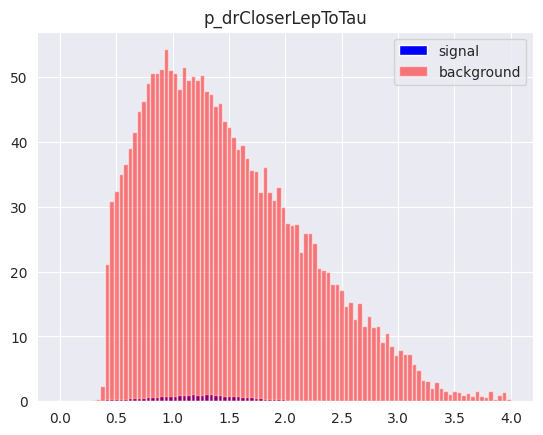

In [24]:
for key in range(len(final_keys)):

    signal_hist, signal_bins, _ = plt.hist(signal[final_keys[key]], bins=100, range=(0, arr_max[key]), weights=weight_signal, alpha=0.5, color='blue')
    background_hist, background_bins, _ = plt.hist(background[final_keys[key]], bins=100, range=(0, arr_max[key]), weights=weight_background, alpha=0.5, color='red')

    max_signal_hist = np.max(signal_hist)
    max_background_hist = np.max(background_hist)

    print(f'Max value on Y-axis for signal: {max_signal_hist}')
    print(f'Max value on Y-axis for background: {max_background_hist}')

    plt.clf()

    plt.hist(signal[final_keys[key]], bins=100, range=(0, arr_max[key]), label="signal", alpha=1, color='blue', weights=weight_signal)
    plt.hist(background[final_keys[key]], bins=100, range=(0, arr_max[key]), label="background", alpha=0.5, color='red', weights=weight_background)
    plt.title(final_keys[key])
    plt.legend()
    plt.show()

In [25]:
sig_before_cut = []

In [26]:
bkg_before_cut = []

In [27]:
weight_sig_before_cut = []

In [28]:
weight_background_before_cut = []

Z wagami i selection

Max value on Y-axis for signal: 1.2327580451965332
Max value on Y-axis for background: 73.85688781738281
s: 10.262753898161463
b: 676.3367363214493
sqrt(b): 26.00647489225422
s/sqrt(b) 0.3946230290987313


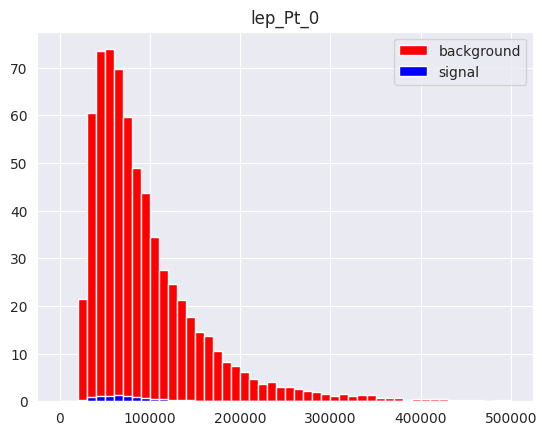

Max value on Y-axis for signal: 1.4626853466033936
Max value on Y-axis for background: 157.27684020996094
s: 10.261054957460146
b: 677.442644033581
sqrt(b): 26.02772836867599
s/sqrt(b) 0.394235517295823


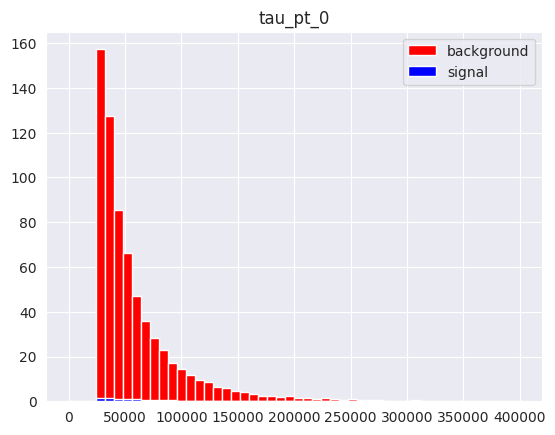

Max value on Y-axis for signal: 0.9820617437362671
Max value on Y-axis for background: 28.416913986206055
s: 10.259317862452008
b: 678.1271617412567
sqrt(b): 26.04087482672686
s/sqrt(b) 0.3939697852209801


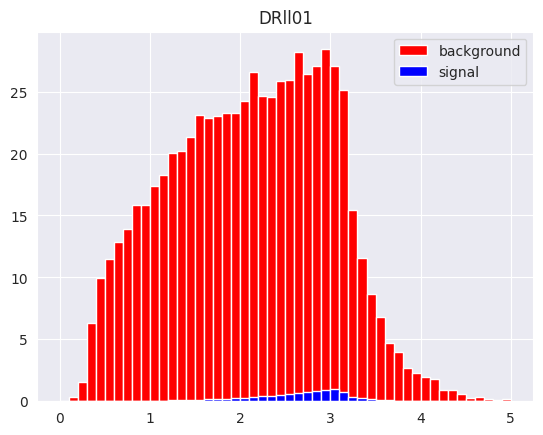

Max value on Y-axis for signal: 0.8198350071907043
Max value on Y-axis for background: 39.494529724121094
s: 10.262753853341565
b: 677.7191404029727
sqrt(b): 26.033039400019597
s/sqrt(b) 0.3942203480602361


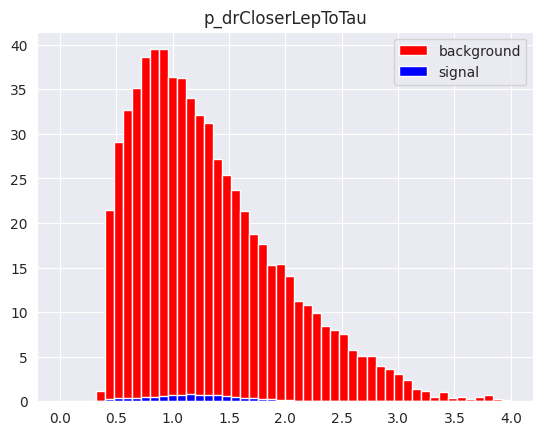

In [34]:
for key in range(len(final_keys)):
    signal_sel, background_sel, weight_signal2, weight_background2 = selection(final_keys[key])
    sig_before_cut.append(signal_sel)
    bkg_before_cut.append(background_sel)
    weight_sig_before_cut.append(weight_signal2)
    weight_background_before_cut.append(weight_background2)

    signal_hist, signal_bins, _ = plt.hist(signal_sel, bins=50, range=(0, arr_max[key]), weights=weight_signal2, alpha=0.5, color='blue')
    background_hist, background_bins, _ = plt.hist(background_sel, bins=50, range=(0, arr_max[key]), weights=weight_background2, alpha=0.5, color='red')

    max_signal_hist = np.max(signal_hist)
    max_background_hist = np.max(background_hist)
    
    s = np.sum(signal_hist)
    b = np.sum(background_hist)
    
    print(f'Max value on Y-axis for signal: {max_signal_hist}')
    print(f'Max value on Y-axis for background: {max_background_hist}')
    print(f's: {s}')
    print(f'b: {b}')
    print(f'sqrt(b): {np.sqrt(b)}')
    print(f's/sqrt(b) {s/np.sqrt(b)}')
    plt.clf()

    plt.hist(background_sel, bins=50, range=(0, arr_max[key]), label="background", alpha=1, color='red', weights=weight_background2)
    plt.hist(signal_sel, bins=50, range=(0, arr_max[key]), label="signal", alpha=1, color='blue', weights=weight_signal2)
    plt.title(final_keys[key])
    plt.legend()
    plt.show()

Z losses

In [30]:
def cutting(sig, bkg, wght_signal, wght_background):
    sig_arr = []
    bkg_arr = []
    wgh_sig = []
    wgh_bkg = []
    
    for i in range(len(sig)):
        if signal_loss[i] < 0.008: 
            sig_arr.append(sig[i])
            wgh_sig.append(wght_signal[i])
            
    for j in range(len(bkg)):
        if background_loss[j] < 0.008:
            bkg_arr.append(bkg[j])
            wgh_bkg.append(wght_background[j])
    return sig_arr, bkg_arr, wgh_sig, wgh_bkg

Max value on Y-axis for signal: 1.1647239923477173
Max value on Y-axis for background: 5.5495195388793945
s: 9.780329652014188
b: 50.80899091018364
sqrt(b): 7.128042572136031
s/sqrt(b) 1.372091924681555


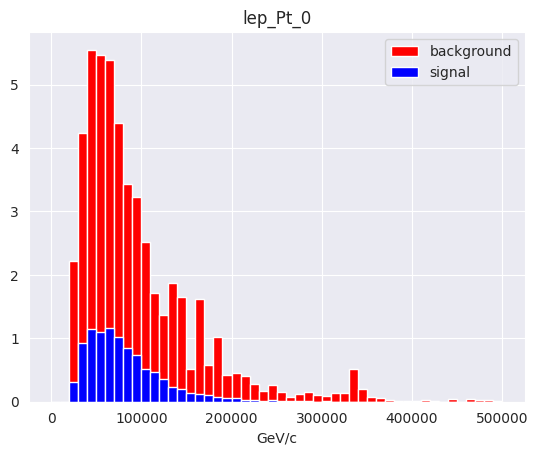

Max value on Y-axis for signal: 1.3890597820281982
Max value on Y-axis for background: 12.656623840332031
s: 9.778630599495955
b: 50.93734641838819
sqrt(b): 7.137040452343547
s/sqrt(b) 1.370124026168999


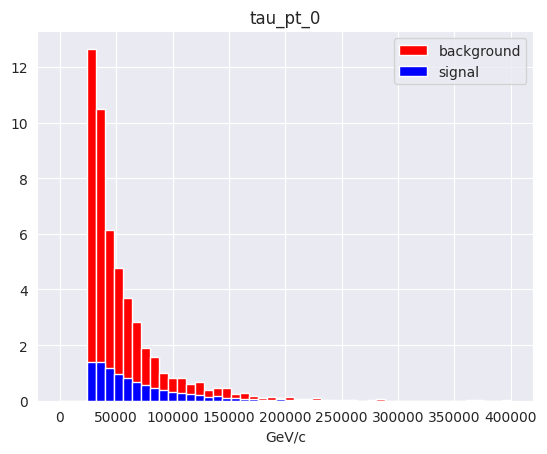

Max value on Y-axis for signal: 0.929875910282135
Max value on Y-axis for background: 2.249506950378418
s: 9.776893482194282
b: 50.96539321844466
sqrt(b): 7.1390050580206665
s/sqrt(b) 1.3695036497011512


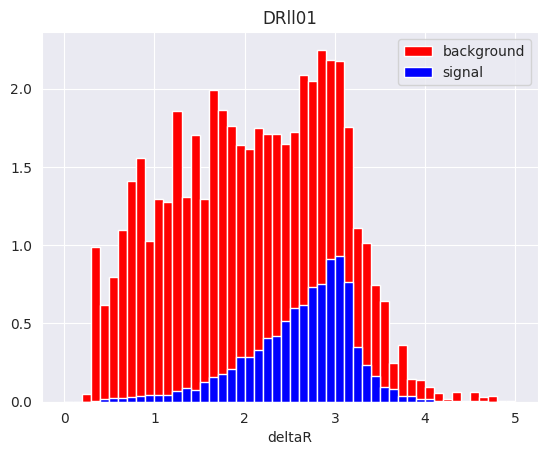

Max value on Y-axis for signal: 0.7758891582489014
Max value on Y-axis for background: 3.368379831314087
s: 9.780329445144162
b: 50.90972835756838
sqrt(b): 7.1351053501380335
s/sqrt(b) 1.3707337124258374


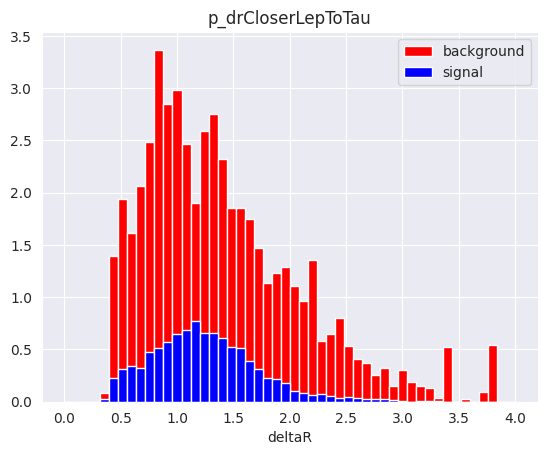

In [32]:
for key in range(len(final_keys)):
    signal_sel2, background_sel2, weight_signal3, weight_background3 = selection(final_keys[key])
    sig_cut, bkg_cut, sig_wght, bkg_wght = cutting(signal_sel2, background_sel2, weight_signal3, weight_background3)

    signal_hist2, signal_bins2, _ = plt.hist(sig_cut, bins=50, range=(0, arr_max[key]), weights=sig_wght, alpha=0.5, color='blue')
    background_hist2, background_bins2, _ = plt.hist(bkg_cut, bins=50, range=(0, arr_max[key]), weights=bkg_wght, alpha=0.5, color='red')

    max_signal_hist = np.max(signal_hist2)
    max_background_hist = np.max(background_hist2)
    
    sl = np.sum(signal_hist2)
    bl = np.sum(background_hist2)
    
    print(f'Max value on Y-axis for signal: {max_signal_hist}')
    print(f'Max value on Y-axis for background: {max_background_hist}')
    print(f's: {sl}')
    print(f'b: {bl}')
    print(f'sqrt(b): {np.sqrt(bl)}')
    print(f's/sqrt(b) {sl/np.sqrt(bl)}')

    plt.hist(bkg_cut, bins=50, range=(0, arr_max[key]), weights=bkg_wght, alpha=1, color='red', label="background")
    plt.hist(sig_cut, bins=50, range=(0, arr_max[key]), weights=sig_wght, alpha=1, color='blue', label="signal")
    plt.xlabel(xlabels[key])
    plt.title(final_keys[key])
    plt.legend()
    plt.show()
